In [9]:
import os
import warnings

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

%load_ext autoreload
%autoreload 2

from soma.generators.dc2 import DC2Generator
from soma.generators.nmist import NmistGenerator
from soma.generators.normal import MultivariateNormalGenerator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_sample_size
from soma.util.plot import plot_errors, plot_time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plot_dir = os.path.expanduser('~/Plots/power_sample_size')
os.makedirs(plot_dir, exist_ok=True)

In [102]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [103]:
samples = np.array([100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000])
repeat = 500

# DC2 MAG Filtered

In [104]:
dc2 = DC2Generator()
dc2_abs = DC2Generator(abs_mag=22)

In [105]:
dc2_results = stat_errors_vs_sample_size(dc2_abs, dc2, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [106]:
dc2_results.to_csv(os.path.join(plot_dir, 'dc2_mag_power_samples.csv'))

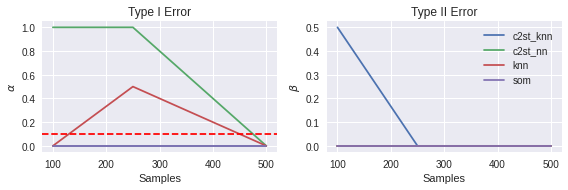

In [107]:
dc2_abs_fig = plot_errors(dc2_results)
dc2_abs_fig.savefig(os.path.join(plot_dir, 'dc2_mag_power_samples.eps'))

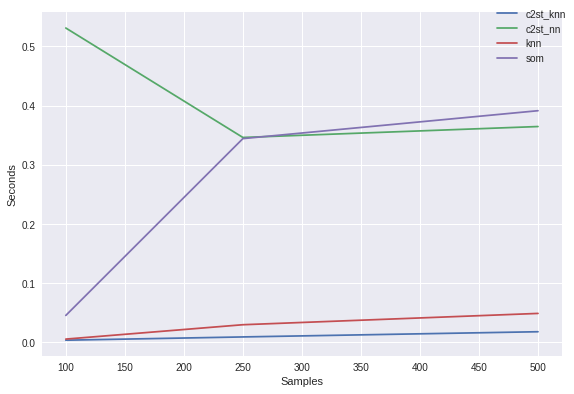

In [108]:
dc2_mag_time = plot_time(dc2_results)
dc2_mag_time.savefig(os.path.join(plot_dir, 'dc2_mag_time_samples.eps'))

# DC2 SNR

In [109]:
dc2_snr = DC2Generator(snr=10)

In [110]:
dc2_snr_results = stat_errors_vs_sample_size(dc2_snr, dc2, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [111]:
dc2_snr_results.to_csv(os.path.join(plot_dir, 'dc2_snr_results_samples.csv'))

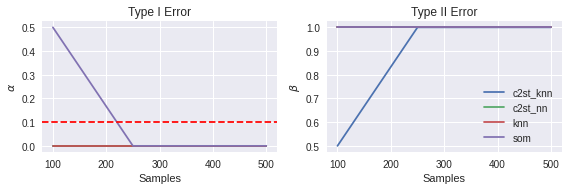

In [112]:
dc2_snr_fig = plot_errors(dc2_snr_results)
dc2_snr_fig.savefig(os.path.join(plot_dir, 'dc2_snr_power_samples.eps'))

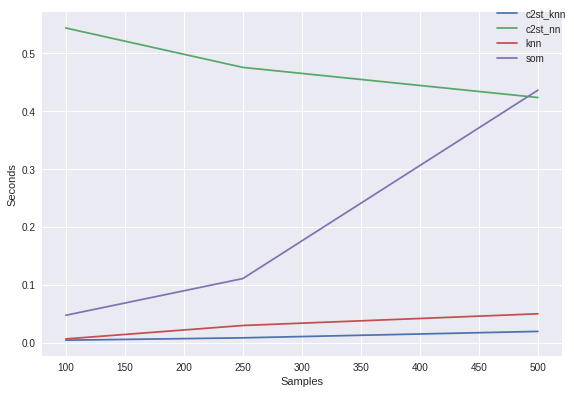

In [113]:
dc2_snr_time = plot_time(dc2_snr_results)
dc2_snr_time.savefig(os.path.join(plot_dir, 'dc2_snr_time_samples.eps'))

# NMIST

In [114]:
nmist2 = NmistGenerator(2)
nmist3 = NmistGenerator(3)

In [115]:
nmist_results = stat_errors_vs_sample_size(nmist2, nmist3, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [117]:
nmist_results.to_csv(os.path.join(plot_dir, 'nmist_results_samples.csv'))

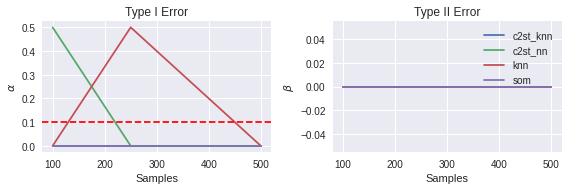

In [116]:
nmist_fig = plot_errors(nmist_results)
nmist_fig.savefig(os.path.join(plot_dir, 'nmist_power_samples.eps'))

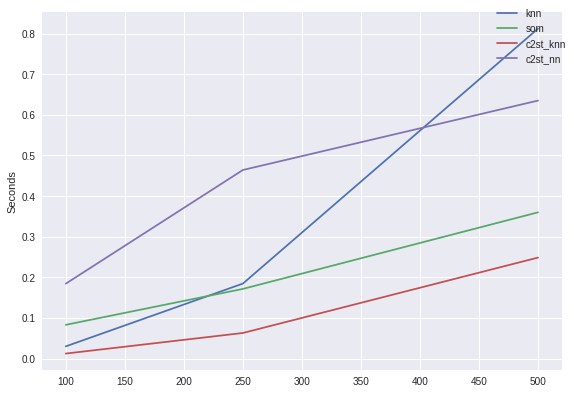

In [22]:
nmist_time = plot_time(samples, nmist_results)
nmist_time.savefig(os.path.join(plot_dir, 'nmist_time_samples.eps'))

# Normal (location)

In [118]:
means = np.zeros(1000)
means2 = np.ones(1000)

n1 = MultivariateNormalGenerator(means, cov=np.diag(np.ones(1000)))
n2 = MultivariateNormalGenerator(means2, cov=np.diag(np.ones(1000)))

In [119]:
normal_results = stat_errors_vs_sample_size(n2, n1, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [120]:
normal_results.to_csv(os.path.join(plot_dir, 'normal_results_samples.csv'))

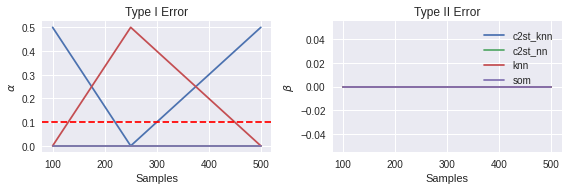

In [123]:
normal_loc_fig = plot_errors(normal_results)
normal_loc_fig.savefig(os.path.join(plot_dir, 'normal_111_power_samples.eps'))

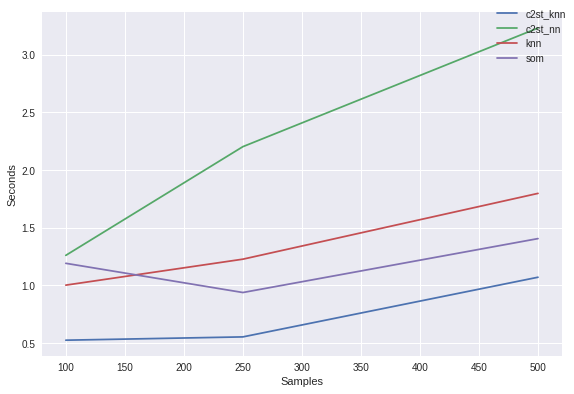

In [125]:
normal_loc_time = plot_time(normal_results)
normal_loc_time.savefig(os.path.join(plot_dir, 'normal_loc_time_samples.eps'))

# Normal (location, fair)

In [126]:
means3 = np.zeros(1000)
means2[0] = 1.

n3 = MultivariateNormalGenerator(means3, cov=np.diag(np.ones(1000)))

In [127]:
n3_results = stat_errors_vs_sample_size(n3, n1, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [128]:
n3_results.to_csv(os.path.join(plot_dir, 'n3_results_samples.csv'))

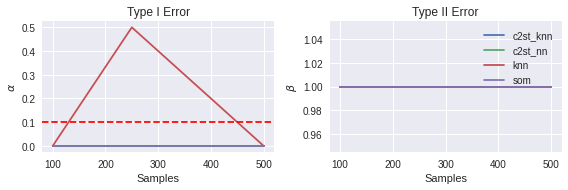

In [131]:
normal_fair_fig = plot_errors(n3_results)
normal_fair_fig.savefig(os.path.join(plot_dir, 'normal_fair_power_samples.eps'))

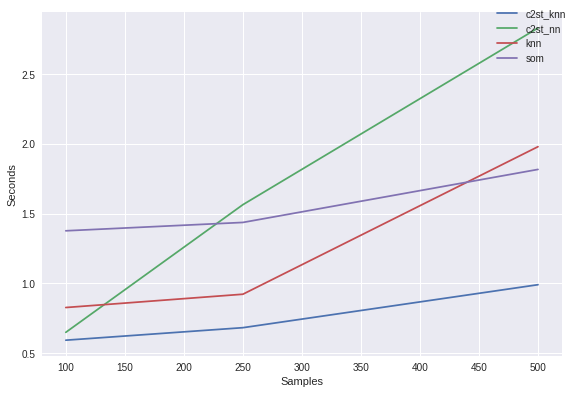

In [132]:
normal_fair_time = plot_time(n3_results)
normal_fair_time.savefig(os.path.join(plot_dir, 'normal_fair_time_samples.eps'))

# Normal (scale)

In [133]:
ns1 = MultivariateNormalGenerator(means, wishart_df=len(means) + 1)
ns2 = MultivariateNormalGenerator(means, wishart_df=len(means) + 1)

In [134]:
ns_results = stat_errors_vs_sample_size(ns1, ns2, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
ns_results.to_csv(os.path.join(plot_dir, 'ns_results_samples.csv'))

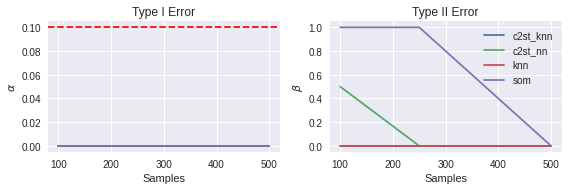

In [136]:
normal_scale_fig = plot_errors(ns_results)
normal_scale_fig.savefig(os.path.join(plot_dir, 'normal_scale_power_samples.eps'))

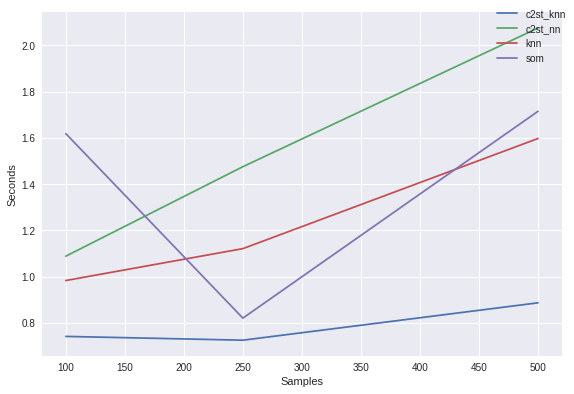

In [137]:
normal_scale_time = plot_time(ns_results)
normal_scale_time.savefig(os.path.join(plot_dir, 'normal_scale_time_samples.eps'))

# Normal (scale, fair)

In [138]:
nsf1 = MultivariateNormalGenerator(means, wishart_df=len(means) * 32)
nsf2 = MultivariateNormalGenerator(means, wishart_df=len(means) * 32)

In [139]:
nsf_results = stat_errors_vs_sample_size(nsf1, nsf2, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [140]:
nsf_results.to_csv(os.path.join(plot_dir, 'nsf_results_samples.csv'))

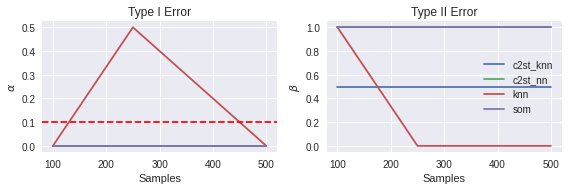

In [141]:
normal_scale_fair_fig = plot_errors(nsf_results)
normal_scale_fair_fig.savefig(os.path.join(plot_dir, 'normal_scale_fair_power_samples.eps'))

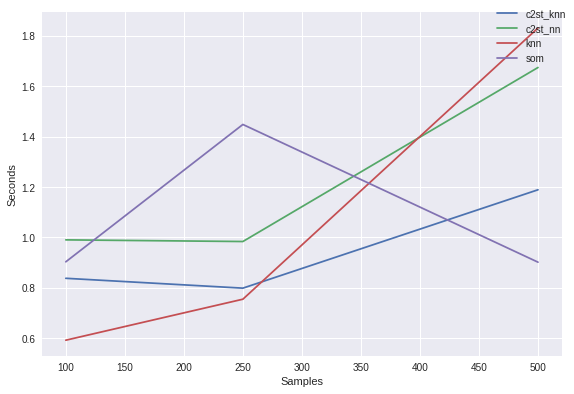

In [142]:
normal_scale_fair_time = plot_time(nsf_results)
normal_scale_fair_time.savefig(os.path.join(plot_dir, 'normal_scale_fair_time_samples.eps'))